# CSE 555 Introduction to Pattern Recognition Spring 2020
# Problem Set 4 - Neural Networks
## Srisai Karthik Neelamraju, 50316785 neelamra@buffalo.edu

In this problem set, we will train a neural network to identify the digit on a image in the MNIST dataset. This neural network has 10 softmax output nodes generating $p(t=m|x;w)$ where $m=0,1,2,...,9$. Let $x_n \in R^{28 \times 28}$ be the $28 \times 28$ images, $t_n$ be the label of the image $x_n$, $w$ be the synaptic weights of the neural network, and $n$ be the index of a pattern in the training dataset.

### 1. Demonstrate that a neural network to maximize the log likelihood of label is one that has softmax output nodes and minimizes the criterion function of the negative log probability of training dataset $J_0(w)$.

In multi-class classification problems, softmax function is the preferred activation in the output layer because softmax activation gives output values whose sum equals 1. This criterion has to be satisfied in this scenario because an image has to belong to one of the 10 classes and consequently, the sum of the probabilities of an image belonging to each of the 10 classes should be 1.

Further, the likelihood of labels is given by $\prod_n p(t=t_n|x_n;w)$ since all the $n$ labels are independent. Maximizing the log likelihood involves finding the weights $w$ that maximize $\log\prod_n p(t=t_n|x_n;w)$. In other words, the maximum likelihood estimate $\hat{w}_{MLE}$ of $w$ is,

\begin{align*}
\hat{w}_{MLE} &= \textrm{arg} \max_w \left(\log\prod_n p(t=t_n|x_n;w)\right)\\
&= \textrm{arg} \max_w \left(\sum_n\log p(t=t_n|x_n;w)\right)
\end{align*}

The ground truth (training label) $t_n$ can be represented in the form of a one-hot encoded vector of length 10 as follows,

$$t_{n,m}=\begin{cases}
1, & \textrm{if } t_n = m\\
0, & \textrm{otherwise}
\end{cases}$$

Using this one-hot vector representation for the actual labels, the maximum likelihood estimate can be written as,

\begin{align*}
\hat{w}_{MLE} &= \textrm{arg} \max_w \left(\sum_n \sum_{m=0}^9 t_{n,m} \log p(t=m|x_n;w)\right)\\
&= \textrm{arg} \min_w \left(-\sum_n \sum_{m=0}^9 t_{n,m} \log p(t=m|x_n;w)\right)\\
&= \textrm{arg} \min_w \left(-\sum_n \sum_{m=0}^9 \log p(t=m|x_n;w)^{t_{n,m}}\right)\\
&= \textrm{arg} \min_w \left(-\sum_n \log \prod_{m=0}^9 p(t=m|x_n;w)^{t_{n,m}}\right)\\
&= \textrm{arg} \min_w \left(-\log \prod_n \prod_{m=0}^9 p(t=m|x_n;w)^{t_{n,m}}\right)\\
&= \textrm{arg} \min_w J_0(w)
\end{align*}

In this way, we observe that a neural network that maximizes the log likelihood of label has softmax output nodes and minimizes the criterion function of the negative log probability of training dataset.

### Demonstrate that a neural network to maximize the a posterior likelihood of observing the training data given a Gaussian prior of the weight distribution $p(w;\alpha) = N(0,\alpha I)$ is one that minimizes the criterion function with L2 regularization $J(w) = J_0(w) - \log p(w; \alpha^{-1})$.

The maximum a posterior estimation involves finding the weights $w$ that maximize $p(w|t=t_n)$. By applying Bayes' theorem, this term can be written as

\begin{align*}
p(w|t=t_n) &= \frac{p(t=t_n|x_n;w)p(w)}{p(t=t_n)}\\
\Rightarrow p(w|t=t_n) &\propto p(t=t_n|x_n;w)p(w)
\end{align*}

Further, by considering all the training examples and taking logarithm, the expression to maximize evaluates to $\log\left(\prod_n p(t=t_n|x_n;w)p(w;\alpha)\right)$. In other words, the maximum a posterior estimate $\hat{w}_{MAP}$ of $w$ is

\begin{align*}
\hat{w}_{MAP} &= \textrm{arg} \max_w \log\left(\prod_n p(t=t_n|x_n;w)p(w;\alpha)\right)\\
&= \textrm{arg} \max_w \left(\sum_n\log p(t=t_n|x_n;w)p(w;\alpha)\right)\\
&= \textrm{arg} \min_w \left(-\sum_n\log p(t=t_n|x_n;w)p(w;\alpha)\right)
\end{align*}

Using the one-hot vector representation as described above, the maximum a posterior estimate can be written as,

\begin{align*}
\hat{w}_{MAP} &= \textrm{arg} \min_w \left(-\sum_n \sum_{m=0}^9 t_{n,m} \log p(t=m|x_n;w)p(w;\alpha)\right)\\
&= \textrm{arg} \min_w \left(\underbrace{\left(-\sum_n \sum_{m=0}^9 t_{n,m} \log p(t=m|x_n;w)\right)}_{J_0(w)} - \sum_n \sum_{m=0}^9 t_{n,m}\log p(w;\alpha)\right)\\
&= \textrm{arg} \min_w \left(J_0(w) - \sum_n \sum_{m=0}^9 t_{n,m}\log p(w;\alpha)\right)
\end{align*}

Since the weight distribution has a Gaussian prior with mean $0$ and variance $\alpha$, i.e., $p(w;\alpha) = N(0,\alpha I)$, we have

\begin{align*}
\sum_n \sum_{m=0}^9 t_{n,m}\log p(w;\alpha) &= \sum_n \sum_{m=0}^9 t_{n,m}\log \left(\frac{1}{\sqrt{2\pi\alpha}}e^{-\frac{w^2}{2\alpha}}\right)\\
&= \sum_n \sum_{m=0}^9 t_{n,m}\left[\log \left(\frac{1}{\sqrt{2\pi\alpha}}\right) - \frac{w^2}{2\alpha}\right]\\
&= \sum_n \sum_{m=0}^9 t_{n,m}\left[\log \left(\frac{1}{\sqrt{2\pi\alpha}}\right) - \frac{w^2}{2}\alpha^{-1}\right]
\end{align*}

In the expression on the right hand side, the log term is a constant and all the $w^2$ terms in both the summations add up to give the squared norm of the synaptic weights $w$ of the neural network. Hence, for some real number $\lambda$ that is dependent on $\alpha^{-1}$, this expression can be written as,

$$\sum_n \sum_{m=0}^9 t_{n,m}\log p(w;\alpha) = \textrm{constant} + \underbrace{\lambda\sum_n w^2}_{\textrm{L2-regularization term}}$$

Therefore, the term $\log p(w;\alpha)$ in the expression for $\hat{w}_{MAP}$ corresponds to the L2-regularization and the complete expression itself is the criterion function with L2-regularization. In this way, we observe that a neural network that maximizes the a posterior likelihood of observing the training data given a Gaussian prior of the weight distribution is one that minimizes the criterion function with L2 regularization.

## 2. Implementing different neural network architectures on MNIST dataset

### Importing the required libraries

NumPy is used for basic matrix operations.<br>
TensorFlow is used to implement the neural networks and import the MNIST dataset.<br>
Matplotlib is used for plotting the evaluation metrics against training epochs.<br>
OpenCV is used for performing data augmentation through image rotation and translation.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import cv2

### Loading the MNIST dataset

MNIST Dataset contains 28 $\times$ 28 dimensional grayscale images of handwritten digits from 0 to 9. Specifically, there are 60,000 images in the training set and 10,000 images in the test set. Each of these 70,000 images belongs to one of these 10 classes and has associated with it a label from 0 to 9. However, for the purpose of this assignment, only 1,000 of these images are used as the training set and a separate 1,000 of these are used as the testing set. Both the training and testing sets of images consist of exactly 100 images from each of the 10 categories.

In [2]:
# loading the original dataset consisting of 60,000 training images
(X_tr, Y_tr), (_, _) = mnist.load_data()

x_dim, y_dim = X_tr[0].shape
n_train = 1000
n_test = 1000
n_classes = 10
X_train = []
Y_train = []
X_test = []
Y_test = []

# sampling 1,000 images each for training and test sets
for c in range(n_classes):
    idx = np.random.choice(np.where(Y_tr == c)[0], size = 200, replace=False)
    for i in range(0, 100):
        X_train.append(X_tr[idx[i]])
        Y_train.append(Y_tr[idx[i]])
        X_test.append(X_tr[idx[i+100]])
        Y_test.append(Y_tr[idx[i+100]])
        
# converting the lists into NumPy arrays
X_train = np.array(X_train).reshape(n_train, x_dim, y_dim, 1)
Y_train = np.array(Y_train).reshape(n_train, 1)
X_test = np.array(X_test).reshape(n_train, x_dim, y_dim, 1)
Y_test = np.array(Y_test).reshape(n_test, 1)

# normalizing the data
X_train =  X_train / 255
X_test = X_test / 255

### Defining hyperparameters for training the network

In [3]:
# number of training epochs
epochs = 30

# mini-batch size for gradient descent
minibatch_size = 10

# learning rate of the optimizer
lr = 0.1
lr_cnn = 0.01

# number of hidden units
n_units = 30

# regularization parameter
reg_param = 5.0

### Creating a neural network class for implementing different architectures

In [4]:
class NeuralNetwork:
    """
        implements a fully connected neural network
    """

    def __init__(self, n_hidden=1, reg=False, conv=False):
        """
            initializes a neural network with the given parameters
        """
        # defining the neural network architecture
        self.nn = tf.keras.Sequential()
        self.lr = lr
        if conv:
            self.nn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
            self.nn.add(tf.keras.layers.Dropout(0.2))
            self.nn.add(tf.keras.layers.MaxPooling2D(pool_size=2, padding='valid'))
            self.nn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
            self.nn.add(tf.keras.layers.Dropout(0.2))
            self.nn.add(tf.keras.layers.MaxPooling2D(pool_size=2, padding='valid'))
            self.nn.add(tf.keras.layers.Flatten())
            self.lr = lr_cnn
        else:
            self.nn.add(tf.keras.layers.Flatten(input_shape = (28, 28, 1)))
            regularizer = tf.keras.regularizers.l2(reg_param) if reg else None
            for _ in range(n_hidden):
                self.nn.add(tf.keras.layers.Dense(n_units, activation = 'sigmoid', kernel_regularizer = regularizer))
        self.nn.add(tf.keras.layers.Dense(10, activation='softmax'))
        self.nn.summary()

        # compiling the model
        self.nn.compile(loss='sparse_categorical_crossentropy',
                        optimizer=tf.keras.optimizers.RMSprop(lr=self.lr),
                        metrics=['accuracy'])

        # lists to record the evaluation metrics
        self.train_err = []
        self.test_err = []
        self.train_loss = []
        self.test_loss = []
        self.learn_speed = []
        self.prev_wts = []
        for layer in self.nn.layers:
            self.prev_wts.append(layer.get_weights())

    def fit(self, X_train, Y_train):
        """
            fits the neural network on the MNIST training and test data
        """
        print("Training the neural network for " + str(epochs) + " epochs\n")
        for ep in range(1, epochs + 1):
            # fitting the model to the training data
            hist = self.nn.fit(X_train, Y_train,
                           batch_size=minibatch_size,
                           epochs=1,
                           validation_data=(X_test, Y_test),
                           verbose=False)

            # keeping track of the required evaluation metrics
            self.train_err.append(1 - hist.history['accuracy'][0])
            self.test_err.append(1 - hist.history['val_accuracy'][0])
            self.train_loss.append(hist.history['loss'][0])
            self.test_loss.append(hist.history['val_loss'][0])

            # finding the learning speed of the hidden layers
            curr_wts = [layer.get_weights() for layer in self.nn.layers]
            self.learn_speed.append(self.get_learning_speed(self.prev_wts, curr_wts))
            self.prev_wts = [wt for wt in curr_wts]
            
            print("Epoch " + "{:02d}".format(ep) + "\t train_err: " + "{:.6f}".format(self.train_err[-1]) +
                  "\t test_err: " + "{:.6f}".format(self.test_err[-1]) + "\t train_loss: " +
                  "{:.6f}".format(self.train_loss[-1]) + "\t test_loss: " + "{:.6f}".format(self.test_loss[-1]))

    def plot_metrics(self):
        """
            plots the following evaluation metrics against training epochs
            training error, testing error, training loss, testing loss, learning speed
        """
        # training and testing errors
        plt.plot(range(1, epochs + 1), self.train_err, color='red', linestyle='dashed', linewidth=1.4, label='training')
        plt.plot(range(1, epochs + 1), self.test_err, color='orange', linestyle='dashed', linewidth=1.4, label='testing')
        plt.grid(color='#ADD8E6', linestyle='-', linewidth=0.6)
        plt.title('Comparison of training and testing errors')
        plt.xlabel('Epochs')
        plt.ylabel('Error')
        plt.legend(loc='upper right')
        plt.show()
        plt.figure()
        
        # training and test losses
        plt.plot(range(1, epochs + 1), self.train_loss, color='red', linestyle='dashed', linewidth=1.4, label='training')
        plt.plot(range(1, epochs + 1), self.test_loss, color='orange', linestyle='dashed', linewidth=1.4, label='testing')
        plt.grid(color='#ADD8E6', linestyle='-', linewidth=0.6)
        plt.title('Comparison of training and testing losses')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend(loc='upper right')
        plt.show()
        plt.figure()
        
        # learning speed
        plt.plot(range(1, epochs + 1), self.learn_speed, color='red', linestyle='dashed', linewidth=1.4)
        plt.grid(color='#ADD8E6', linestyle='-', linewidth=0.6)
        plt.title('Learning speed of the network layers')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Speed')
        plt.show()
        plt.figure()

    def get_learning_speed(self, wts1, wts2):
        """
            finds the learning speed of the layers in the neural network, measures
            the average of absolute changes in weights divided by actual weights
        """
        l1 = len(wts1)
        l2 = len(wts2)
        if (l1 != l2):
            print("Two lists with weights have unequal lengths")
            return
        total = 0
        n_wts = 0
        for i in range(l1):
            if len(wts1[i]) == 0:
                continue
            diff = abs((wts1[i][0] - wts2[i][0])/wts1[i][0])
            total += np.sum(diff)
            n_wts += diff.size
        return total/n_wts

### 2(a). 1 hidden layer neural network without regularization

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
Training the neural network for 30 epochs

Epoch 01	 train_err: 0.555000	 test_err: 0.400000	 train_loss: 1.663063	 test_loss: 1.150292
Epoch 02	 train_err: 0.298000	 test_err: 0.311000	 train_loss: 0.976690	 test_loss: 1.123024
Epoch 03	 train_err: 0.231000	 test_err: 0.211000	 train_loss: 0.816182	 test_loss: 0.736342
Epoch 04	 train_err: 0.194000	 test_err: 0.226000	 train_los

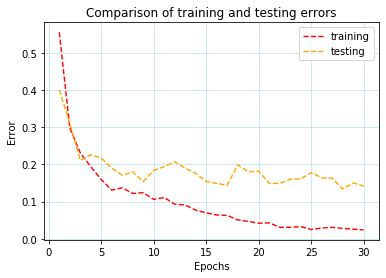

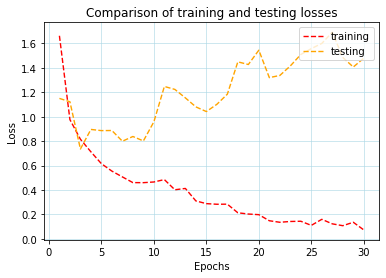

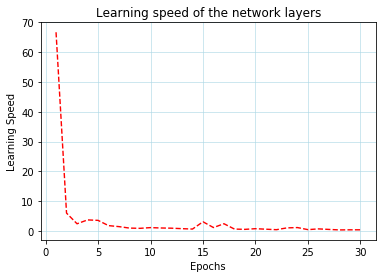

<Figure size 432x288 with 0 Axes>

In [5]:
nn1 = NeuralNetwork(n_hidden=1)
nn1.fit(X_train, Y_train)
nn1.plot_metrics()

### 2(b). 2 hidden layer neural network without regularization

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
Training the neural network for 30 epochs

Epoch 01	 train_err: 0.852000	 test_err: 0.773000	 train_loss: 2.318329	 test_loss: 1.917909
Epoch 02	 train_err: 0.596000	 test_err: 0.402000	 train_loss: 1.627593	 test_loss: 1.101060
Epoch 03	 train_err

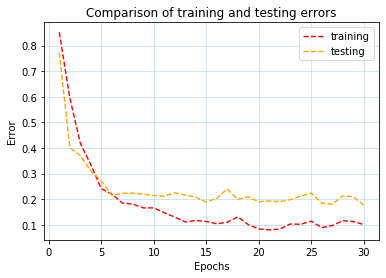

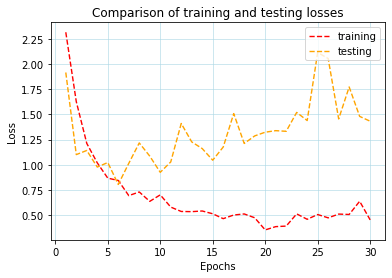

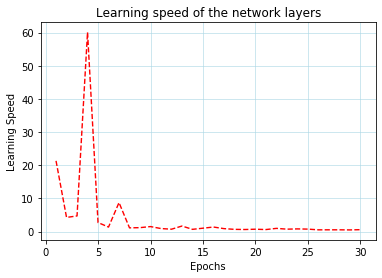

<Figure size 432x288 with 0 Axes>

In [6]:
nn2 = NeuralNetwork(n_hidden=2)
nn2.fit(X_train, Y_train)
nn2.plot_metrics()

### 3 hidden layer neural network without regularization

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_6 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_7 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________
Training the neural network for 30 epochs

Epoch 01	 train_err: 0.847000	 test_err: 0.725000	 train_loss: 2.248670	 

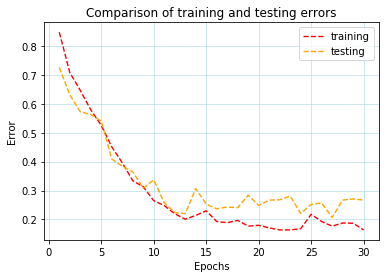

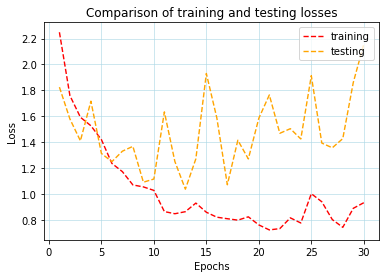

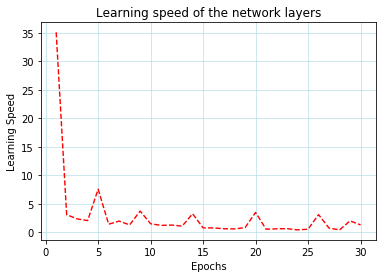

<Figure size 432x288 with 0 Axes>

In [7]:
nn3 = NeuralNetwork(n_hidden=3)
nn3.fit(X_train, Y_train)
nn3.plot_metrics()

### 1 hidden layer neural network with regularization

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
Training the neural network for 30 epochs

Epoch 01	 train_err: 0.870000	 test_err: 0.817000	 train_loss: 341.740077	 test_loss: 288.972638
Epoch 02	 train_err: 0.766000	 test_err: 0.697000	 train_loss: 295.632306	 test_loss: 291.545864
Epoch 03	 train_err: 0.754000	 test_err: 0.830000	 train_loss: 295.786273	 test_loss: 290.794809
Epoch 04	 train_err: 0.803000	 test_err: 0.808

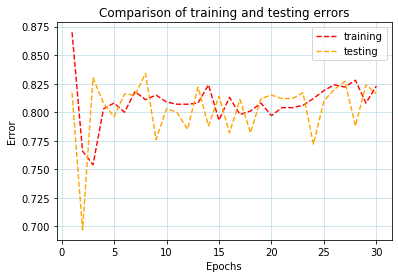

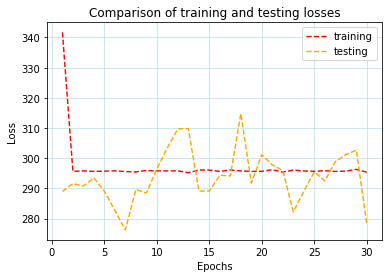

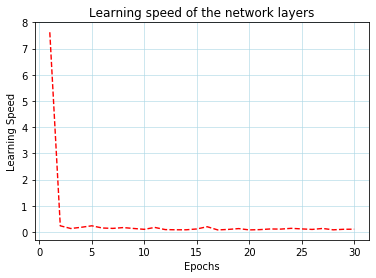

<Figure size 432x288 with 0 Axes>

In [8]:
nn4 = NeuralNetwork(n_hidden=1, reg=True)
nn4.fit(X_train, Y_train)
nn4.plot_metrics()

### 2 hidden layer neural network with regularization

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_12 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
Training the neural network for 30 epochs

Epoch 01	 train_err: 0.894000	 test_err: 0.900000	 train_loss: 350.860282	 test_loss: 308.981439
Epoch 02	 train_err: 0.906000	 test_err: 0.900000	 train_loss: 307.460899	 test_loss: 307.679611
Epoch 03	 t

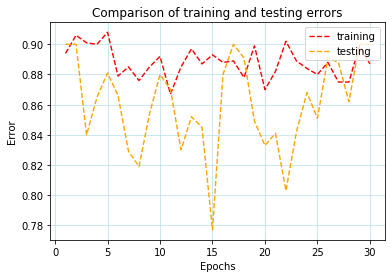

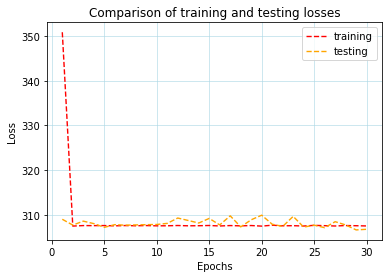

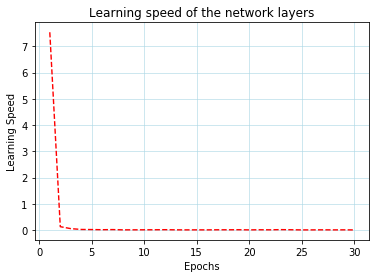

<Figure size 432x288 with 0 Axes>

In [9]:
nn5 = NeuralNetwork(n_hidden=2, reg=True)
nn5.fit(X_train, Y_train)
nn5.plot_metrics()

### 3-hidden layer neural network with regularization

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_15 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_16 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________
Training the neural network for 30 epochs

Epoch 01	 train_err: 0.895000	 test_err: 0.900000	 train_loss: 361.964025

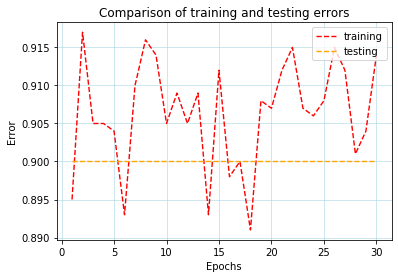

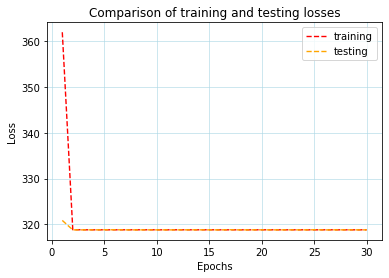

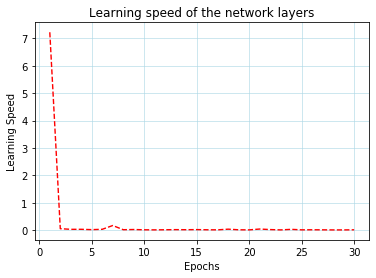

<Figure size 432x288 with 0 Axes>

In [10]:
nn6 = NeuralNetwork(n_hidden=3, reg=True)
nn6.fit(X_train, Y_train)
nn6.plot_metrics()

### 2(c). Convolutional neural network with dropout regularization method

#### Augmenting the training data

In order to prevent overfitting, the 1,000 MNIST images in the training set are subjected to two steps of pre-processing and then the processed images are added back to the training set; doubling the size of the new training set to 2,000. Out of these images, 1,000 are the original images from the MNIST dataset and the rest are the transformed versions of these images. OpenCV library is used for this purpose.<br>

Two steps involved in the transformation of each image are:
1. Rotation by either 1$^{\circ}$ or 2$^{\circ}$ or 3$^{\circ}$ in clockwise or counter-clockwise directions.
2. Translation for 3 pixels in one of the eight possible directions

In [11]:
X_train_cnn = []
Y_train_cnn = []

for i in range(n_train):
    img = X_train[i]
    X_train_cnn.append(img.reshape((x_dim, y_dim, 1)))
    Y_train_cnn.append(Y_train[i])

    # rotate the image
    angle = np.random.choice(range(1, 7))
    if angle <= 3:
        # clockwise rotation
        M = cv2.getRotationMatrix2D((x_dim/2, y_dim/2), angle, 1)
    else:
        # counter-clockwise rotation
        M = cv2.getRotationMatrix2D((x_dim/2, y_dim/2), 360 - (angle - 3), 1)
    img = cv2.warpAffine(img, M, (x_dim, y_dim))
    
    # translate the image
    x_trans, y_trans = np.random.choice([-3, 3], 2)
    M = np.float32([[1, 0, x_trans], [0, 1, y_trans]])
    img = cv2.warpAffine(img, M, (x_dim, y_dim))
    
    # augmenting the transformed image to the training set
    X_train_cnn.append(img.reshape((x_dim, y_dim, 1)))
    Y_train_cnn.append(Y_train[i])

# converting the lists into NumPy arrays
X_train_cnn = np.array(X_train_cnn).reshape(2*n_train, x_dim, y_dim, 1)
Y_train_cnn = np.array(Y_train_cnn).reshape(2*n_train, 1)

#### Implementing the CNN

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1568)             

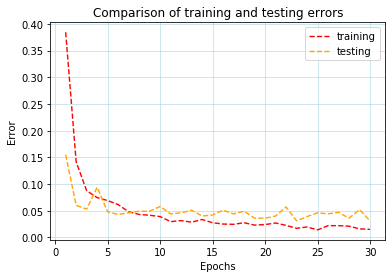

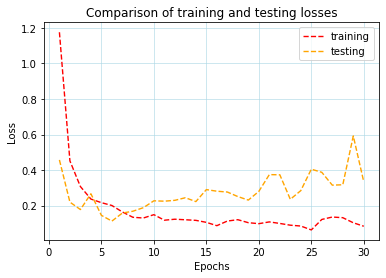

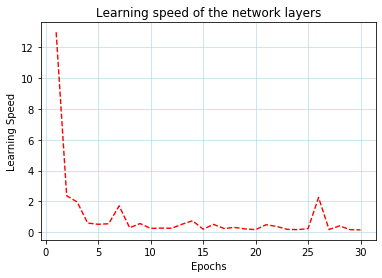

<Figure size 432x288 with 0 Axes>

In [12]:
cnn = NeuralNetwork(conv=True)
cnn.fit(X_train_cnn, Y_train_cnn)
cnn.plot_metrics()

### References

1. Duda, Richard O., Peter E. Hart, and David G. Stork. Pattern Classification. John Wiley & Sons, 2012. <br>
2. CSE 555 Intoduction to Pattern Recognition Lecture Slides by Prof. Wen Dong <br>
3. https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html <br>
4. http://yann.lecun.com/exdb/mnist/